## Project summary

In Agriculture field all farmers facing the problem of plant disease.in olden days their are various way to destroy these disease but in technological time through detection we can easily detect which type of disease are available in particular plant.
Scientists have found that on a global scale plant disease are reducing crop yields for crops by 10 percent to 40 percent ,according to a report by UC Agriculture and Natural Resource Scientist.

This project is based on the detection of Rice leaf disease. With the help of this we can easily detect the disease. We can implement this model with the help of CNN.



### Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models , layers
import matplotlib.pyplot as plt

### Import dataset

In [2]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Rice_leaf",
    shuffle=True)

Found 119 files belonging to 3 classes.


In [3]:
class_names = dataset.class_names
class_names

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

### Visualize some of the images from our dataset

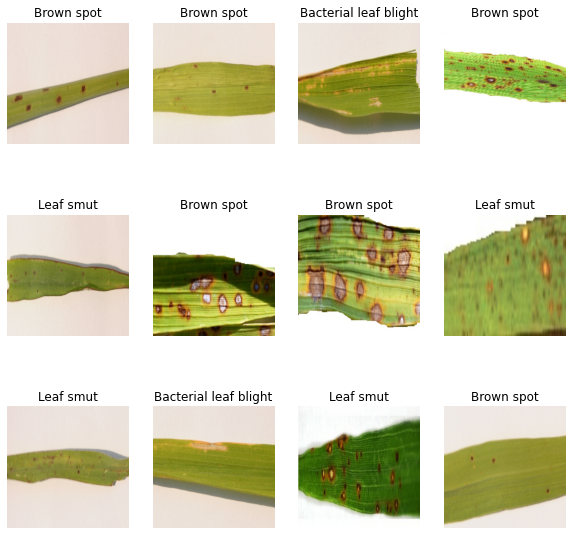

In [4]:
plt.figure(figsize=(10,10))
for image_batch , label_batch in dataset.take(1):
    for i in range(12):
        ax= plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

### Set all the Constants

In [5]:
Image_size = 256
Batch_size = 4
Epochs = 20
channels = 3

#### Loading data again , for processing 

In [6]:
data = tf.keras.preprocessing.image_dataset_from_directory(
    "Rice_leaf" , shuffle=True ,batch_size=4)

Found 119 files belonging to 3 classes.


In [7]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[2 2 2 2 0 1 0 0 2 2 2 0 2 2 0 0 1 0 2 2 1 1 1 2 1 0 1 0 0 1 0 2]


In [8]:
print(image_batch[0].numpy())

[[[249.1618    253.92322   247.95673  ]
  [254.29883   254.60442   254.28787  ]
  [254.96396   253.81294   254.6582   ]
  ...
  [254.05034   254.98198   254.98198  ]
  [254.82736   253.65472   252.65472  ]
  [248.64018   250.58745   247.64018  ]]

 [[249.41602   252.1582    244.41226  ]
  [253.53983   253.73047   249.33485  ]
  [254.58081   251.61975   248.3053   ]
  ...
  [254.7904    254.1211    253.91602  ]
  [252.89517   249.61772   248.79036  ]
  [251.83308   253.79117   250.83308  ]]

 [[174.33203   175.9375    164.05229  ]
  [180.09314   179.38416   165.04163  ]
  [181.15318   178.12779   163.87807  ]
  ...
  [185.27344   180.0491    179.7327   ]
  [185.28549   181.81819   181.65999  ]
  [249.73169   251.08415   248.40793  ]]

 ...

 [[ 18.231808   28.504185    4.4974327]
  [ 18.645035   31.645035    6.044197 ]
  [ 15.253906   31.925503    7.339287 ]
  ...
  [255.        255.        255.       ]
  [255.        255.        255.       ]
  [255.        255.        255.       ]]

 [

In [9]:
print(image_batch[0].shape)

(256, 256, 3)


### Function to Split Dataset
Dataset should be bifurcated into 3 subsets, namely:

* Training: Dataset to be used while training
* Validation: Dataset to be tested against while training
* Test: Dataset to be tested against after we trained a model

In [10]:
len(dataset)

4

In [11]:
train_size = 0.75
len(data)*train_size

22.5

In [12]:
train_data = data.take(22)
len(train_data)

22

In [13]:
test_ds = data.skip(22)
len(test_ds)

8

In [14]:
val_data = test_ds.take(2)
len(val_data)

2

In [15]:
test_data = test_ds.skip(2)
len(test_data)

6

In [16]:
def get_data_partitions_tf(ds, train_split=0.75, val_split=0.10, test_split=0.15, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_data = ds.take(train_size)    
    val_data = ds.skip(train_size).take(val_size)
    test_data = ds.skip(train_size).skip(val_size)
    
    return train_data, val_data, test_data

In [17]:
train_data, val_data, test_data = get_data_partitions_tf(data)

In [18]:
len(train_data)

22

In [19]:
len(val_data)

3

In [20]:
len(test_data)

5

### Building the Model

#### Creating a Layer for Resizing and Normalization

In [21]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(Image_size,Image_size),
    layers.experimental.preprocessing.Rescaling(1./255)])

### Data Augmentation
Data Augmentation is needed when we have less data, this boosts the accuracy of our model by augmenting the data.



In [22]:
data_agumentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)])

### Model Architecture

In [23]:
input_shape = (Batch_size, Image_size, Image_size, channels)
n_classes = 3
model = models.Sequential([resize_and_rescale, 
                          layers.Conv2D(filters=64, kernel_size=(3, 3),input_shape=input_shape, activation='relu'),
                          layers.MaxPooling2D((2, 2)),
                          layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
                          layers.MaxPooling2D((2, 2)),
                          layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
                          layers.MaxPooling2D((2, 2)),
                          layers.Flatten(),
                          layers.Dense(64, activation='relu'),
                          layers.Dense(n_classes, activation='softmax')])
model.build(input_shape=input_shape)

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (4, 256, 256, 3)          0         
                                                                 
 conv2d (Conv2D)             (4, 254, 254, 64)         1792      
                                                                 
 max_pooling2d (MaxPooling2D  (4, 127, 127, 64)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (4, 125, 125, 32)         18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (4, 62, 62, 32)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (4, 60, 60, 32)          

### Compiling the Model
We use adam Optimizer, SparseCategoricalCrossentropy for losses, accuracy as a metric

In [25]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             optimizer='adam',
             metrics=['accuracy'])

In [26]:
history = model.fit(train_data, batch_size=Batch_size, validation_data=val_data, verbose=1, epochs=20)

Epoch 1/20
22/22 [==============================] - 12s 469ms/step - loss: 1.2440 - accuracy: 0.2989 - val_loss: 1.1041 - val_accuracy: 0.2727
Epoch 2/20
22/22 [==============================] - 10s 416ms/step - loss: 1.1044 - accuracy: 0.3793 - val_loss: 1.0765 - val_accuracy: 0.5000
Epoch 3/20
22/22 [==============================] - 10s 414ms/step - loss: 1.1003 - accuracy: 0.3793 - val_loss: 1.0834 - val_accuracy: 0.3636
Epoch 4/20
22/22 [==============================] - 10s 412ms/step - loss: 1.0800 - accuracy: 0.3333 - val_loss: 1.0946 - val_accuracy: 0.3333
Epoch 5/20
22/22 [==============================] - 10s 417ms/step - loss: 1.1037 - accuracy: 0.3908 - val_loss: 1.0627 - val_accuracy: 0.5000
Epoch 6/20
22/22 [==============================] - 10s 415ms/step - loss: 1.0342 - accuracy: 0.4713 - val_loss: 1.2456 - val_accuracy: 0.1667
Epoch 7/20
22/22 [==============================] - 10s 420ms/step - loss: 1.1527 - accuracy: 0.5057 - val_loss: 0.9846 - val_accuracy: 0.5833

In [27]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 1s 105ms/step - loss: 0.0873 - accuracy: 1.0000


#### You can see above that we get 100.00% accuracy for our test dataset. This is considered to be a pretty good accuracy

In [28]:
scores

[0.08730702847242355, 1.0]

Scores is just a list containing loss and accuracy value

### Plotting the Accuracy and Loss Curves

In [29]:
history

In [30]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 22}

In [31]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch

In [32]:
type(history.history['loss'])

list

In [33]:
len(history.history['loss'])

20

In [35]:
history.history['loss'][:]

[1.243967056274414,
 1.1043663024902344,
 1.1002898216247559,
 1.0800375938415527,
 1.1036521196365356,
 1.034201979637146,
 1.152663230895996,
 0.9594037532806396,
 0.8202497959136963,
 0.6485958099365234,
 0.5214799642562866,
 0.5520020127296448,
 0.48126330971717834,
 0.6857345104217529,
 0.407090425491333,
 0.25626370310783386,
 0.2229260802268982,
 0.11243078112602234,
 0.10966420918703079,
 0.16623856127262115]

In [36]:
history.history['accuracy'][:]

[0.29885056614875793,
 0.37931033968925476,
 0.37931033968925476,
 0.3333333432674408,
 0.39080458879470825,
 0.4712643623352051,
 0.5057471394538879,
 0.5287356376647949,
 0.6781609058380127,
 0.7701149582862854,
 0.7931034564971924,
 0.7931034564971924,
 0.8160919547080994,
 0.7356321811676025,
 0.8045976758003235,
 0.8965517282485962,
 0.9080459475517273,
 0.9772727489471436,
 0.9659090638160706,
 0.9195402264595032]

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

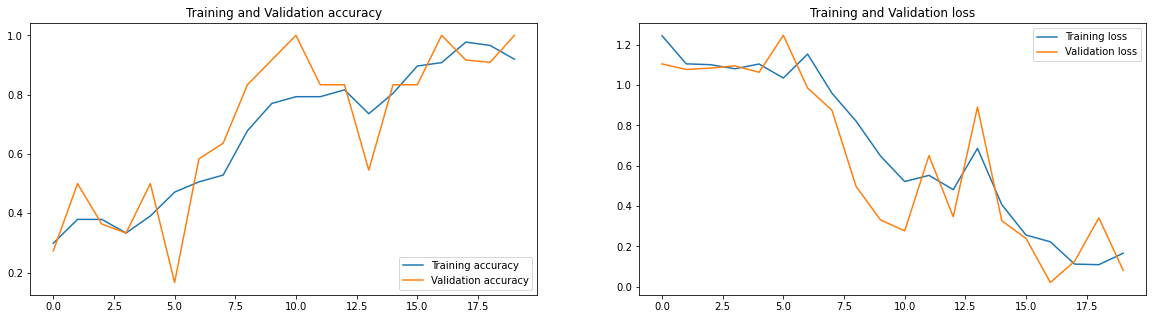

In [38]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.plot(range(Epochs), acc, label='Training accuracy')
plt.plot(range(Epochs), val_acc, label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation accuracy')
 
plt.subplot(1, 2, 2)
plt.plot(range(Epochs), loss, label='Training loss')
plt.plot(range(Epochs), val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation loss')

### Run prediction on a sample image

first image to predict
actual label: Leaf smut
predicted label: Leaf smut


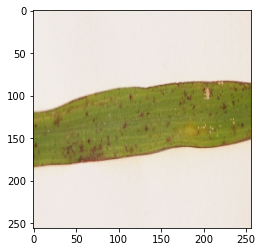

In [39]:
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

### Saving the model

In [43]:
model.save('Rice_leaf_20epochs.h5') # Hierarchial data format

In [44]:
model.metrics_names

['loss', 'accuracy']